In [168]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import feature_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [140]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,20123568,Caucasian,Female,75,1,22,7,7,MC,Orthopedics-Reconstructive,...,9,No,No,No,Up,No,Steady,Ch,Yes,0
1,20377854,Caucasian,Female,65,2,1,1,3,MC,Nephrology,...,6,No,No,No,No,No,Steady,No,Yes,0
2,20408121,Caucasian,Female,95,1,1,7,4,MC,Emergency/Trauma,...,6,No,No,No,No,No,No,No,Yes,0
3,20542797,Caucasian,Male,75,1,2,7,10,MC,InternalMedicine,...,6,Steady,No,No,No,No,Steady,Ch,Yes,0
4,7239654,Caucasian,Female,75,1,3,6,12,UN,InternalMedicine,...,5,No,No,No,No,No,Steady,No,Yes,0


In [141]:
df.shape

(14180, 29)

In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_nbr,14180.0,5.436587e+07,3.830430e+07,729.0,23817559.5,42453580.5,91293534.0,189365864.0
age,14180.0,6.672990e+01,1.549035e+01,5.0,55.0,65.0,75.0,95.0
admission_type_id,14180.0,1.953173e+00,9.014844e-01,1.0,1.0,2.0,3.0,6.0
discharge_disposition_id,14180.0,2.747532e+00,4.137340e+00,1.0,1.0,1.0,3.0,28.0
admission_source_id,14180.0,4.747109e+00,3.255761e+00,1.0,1.0,7.0,7.0,22.0
time_in_hospital,14180.0,3.983568e+00,2.568302e+00,1.0,2.0,3.0,5.0,12.0
num_lab_procedures,14180.0,4.008343e+01,1.972994e+01,1.0,29.0,42.0,54.0,91.0
num_procedures,14180.0,1.200141e+00,1.398517e+00,0.0,0.0,1.0,2.0,5.0
num_medications,14180.0,1.462645e+01,6.860443e+00,1.0,10.0,14.0,19.0,35.0
number_outpatient,14180.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [143]:
print(list(df.select_dtypes(include=[np.number])))

['patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']


In [144]:
numerical_features = ['patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                      'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
                      'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']

clf = linear_model.LogisticRegression()
X = df[numerical_features]
Y = df['readmitted']

clf.fit(X, Y)

# Printing model evaluation metrics and coefficients
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))
print("Coefficients:\n")
for feat, coef in zip(numerical_features, clf.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))

Model score:
 0.9209449929478138
Intercept:
 [-0.00035111]
Coefficients:

          patient_nbr: -4.477644077325943e-09
                  age: -0.02215741479053256
    admission_type_id: -0.0005943221077065702
 discharge_disposition_id: -0.0005019747116444842
  admission_source_id: -0.0016381590472951688
     time_in_hospital: -0.0012851708923689777
   num_lab_procedures: -0.014764778913587117
       num_procedures: -0.0004047216598528716
      num_medications: -0.0047103841655896485
    number_outpatient: 0.0
     number_emergency: 0.0
     number_inpatient: -1.664194985218264e-05
     number_diagnoses: -0.0019337917566853715
           readmitted: 0.00023475554106425827


In [145]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating and fitting the logistic regression model
clf = linear_model.LogisticRegression()
clf.fit(X_train, Y_train)

# Printing model scores against training and test data
print("Score against training data: {}".format(clf.score(X_train, Y_train)))
print("Score against test data: {}".format(clf.score(X_test, Y_test)))

Score against training data: 0.9201339915373766
Score against test data: 0.9241889985895627


In [146]:
df_cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [147]:
le = LabelEncoder()
for col in df_cat_cols:
    df[col] = le.fit_transform(df[col])

In [148]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,20123568,2,0,75,1,22,7,7,6,24,...,9,1,1,1,3,1,2,0,1,0
1,20377854,2,0,65,2,1,1,3,6,16,...,6,1,1,1,1,1,2,1,1,0
2,20408121,2,0,95,1,1,7,4,6,5,...,6,1,1,1,1,1,1,1,1,0
3,20542797,2,1,75,1,2,7,10,6,15,...,6,2,1,1,1,1,2,0,1,0
4,7239654,2,0,75,1,3,6,12,14,15,...,5,1,1,1,1,1,2,1,1,0


In [149]:
# Create a logistic regression model
model = linear_model.LogisticRegression()

# Define the feature matrix X0 and the target variable Y0
X0 = df.loc[:, df.columns != 'readmitted']
Y0 = df['readmitted']

# Initialize the RFE selector with a logistic regression model and select 15 features with a step of 2
selector = feature_selection.RFE(model, n_features_to_select=15, step=2)

# Fit the selector to the data
selector = selector.fit(X0, Y0)

# Get the selected features based on the support_ attribute of the selector
selected_features = X0.loc[:, selector.support_]

# Print the selected features
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
race,
gender,
admission_type_id,
discharge_disposition_id,
admission_source_id,
time_in_hospital,
num_procedures,
number_diagnoses,
metformin,
glipizide,
glyburide,
pioglitazone,
rosiglitazone,
change,
diabetesMed


In [150]:
# Assigning selected features to X
X = selected_features

# Assigning the target variable 'income' to Y
Y = df['readmitted']

# Splitting the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
acc = accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy')
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(acc))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.921015514809591
Accuracy score: 0.921015514809591
Cross-validation mean scores: 0.9209449929478138


In [151]:
def classify_for_threshold(clf, testX, testY, t):
    # Predicting probabilities for the positive class
    prob_data = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    
    # Classifying based on the specified threshold
    prob_data['predict'] = np.where(prob_data[0] >= t, 1, 0)
    
    # Adding the actual labels
    prob_data['actual'] = testY
    
    # Creating a cross-tabulation of predicted vs. actual labels
    return pd.crosstab(prob_data['actual'], prob_data['predict'])

# Specified thresholds
thresholds = [0.05, 0.10, 0.20]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.05: 
predict   0    1
actual          
0.0      53  445
1.0       5   43

Confusion Matrix for Threshold 0.1: 
predict    0   1
actual          
0.0      405  93
1.0       37  11

Confusion Matrix for Threshold 0.2: 
predict    0  1
actual         
0.0      495  3
1.0       48  0


AUC = 0.5569820266353096


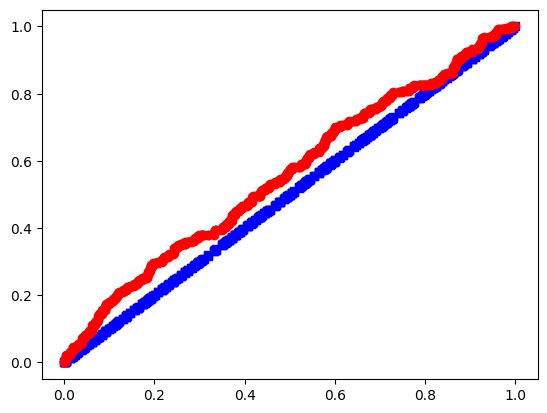

In [152]:
# Predicting probabilities for the positive class
prob = np.array(clf.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.96302349 0.03697651]
 [0.93920984 0.06079016]
 [0.93649208 0.06350792]
 ...
 [0.93892956 0.06107044]
 [0.80078781 0.19921219]
 [0.9019645  0.0980355 ]]


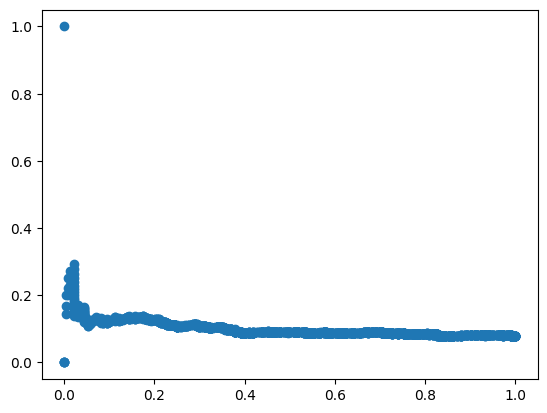

In [153]:
pred_score = clf.predict_proba(testX)
print(pred_score)

testY = testY - 1  # Assuming testY has values 1 and 2

p,r,t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:,1])
plt.figure()
plt.scatter(r,p)
plt.show()

In [154]:
# Create an undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_undersampled, y_undersampled = undersampler.fit_resample(X, Y)

# Check the new class distribution
print("Original dataset shape:", Counter(Y))
print("Undersampled dataset shape:", Counter(y_undersampled))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=0)


# Creating a logistic regression classifier
clf_under = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_under.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_under.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_undersampled, y_undersampled, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 13059, 1: 1121})
Undersampled dataset shape: Counter({0: 1121, 1: 1121})
Mean hits: 0.5612472160356348
Accuracy score: 0.5612472160356348
Cross-validation mean scores: 0.5527678571428571


In [155]:
# Specified thresholds
thresholds = [0.4, 0.45, 0.5]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_under, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict  0  1
actual       
0.0      1  2
1.0      1  4

Confusion Matrix for Threshold 0.45: 
predict  0  1
actual       
0.0      2  1
1.0      1  4

Confusion Matrix for Threshold 0.5: 
predict  0  1
actual       
0.0      3  0
1.0      2  3


AUC = 0.57981220657277


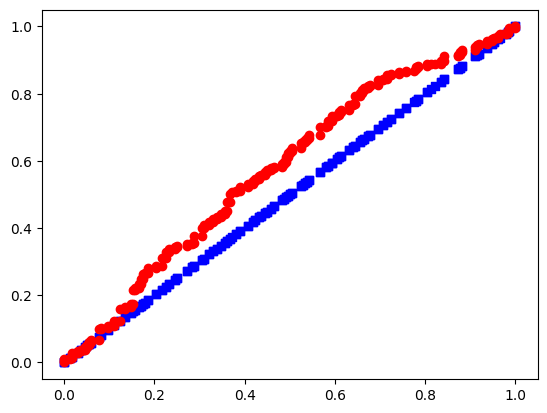

In [156]:
# Predicting probabilities for the positive class
prob = np.array(clf_under.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

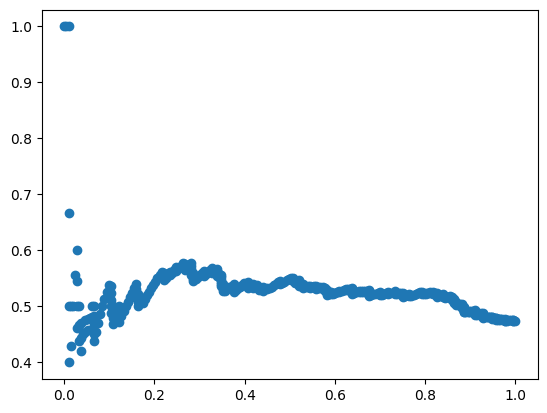

In [157]:
pred_score = clf_under.predict_proba(testX)

testY = testY - 1  # Assuming testY has values 1 and 2

p,r,t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:,1])
plt.figure()
plt.scatter(r,p)
plt.show()

In [169]:
# Create an undersampler object
oversampler = RandomOverSampler(random_state=42)

# Undersample the data
X_over, y_over = oversampler.fit_resample(X, Y)

# Check the new class distribution
print("Original dataset shape:", Counter(Y))
print("Undersampled dataset shape:", Counter(y_over))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_over, y_over, test_size=0.2, random_state=0)


# Creating a logistic regression classifier
clf_over = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_over.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_over.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
acc = accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_over, y_over, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(acc))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 13059, 1: 1121})
Undersampled dataset shape: Counter({0: 13059, 1: 13059})
Mean hits: 0.5610643185298622
Accuracy score: 0.5610643185298622
Cross-validation mean scores: 0.5549011779003075


In [170]:
# Specified thresholds
thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_over, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict    0    1
actual           
0.0      115  806
1.0        9   82

Confusion Matrix for Threshold 0.5: 
predict    0    1
actual           
0.0      478  443
1.0       51   40

Confusion Matrix for Threshold 0.6: 
predict    0   1
actual          
0.0      823  98
1.0       85   6


AUC = 0.5936528934099438


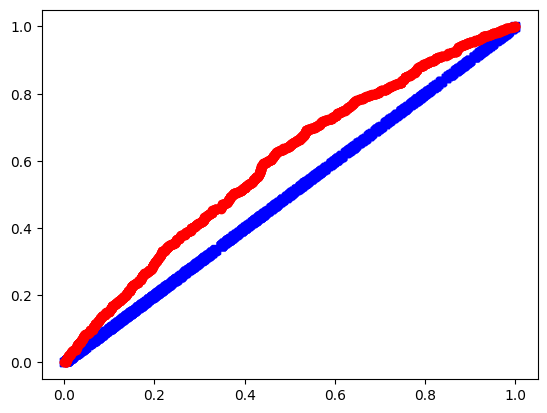

In [171]:
# Predicting probabilities for the positive class
prob = np.array(clf_over.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.423746   0.576254  ]
 [0.52445386 0.47554614]
 [0.37430734 0.62569266]
 ...
 [0.4613976  0.5386024 ]
 [0.54267607 0.45732393]
 [0.59007687 0.40992313]]


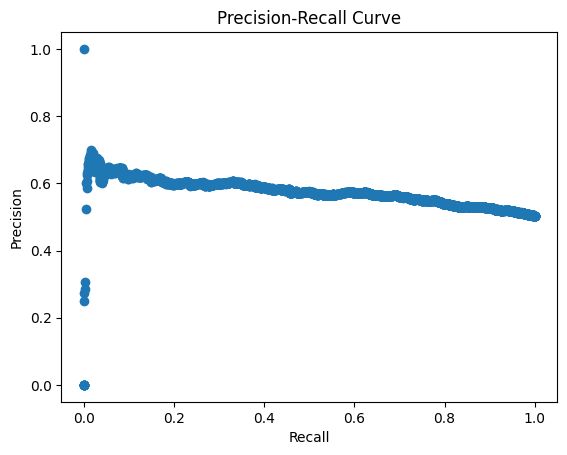

In [172]:
pred_score = clf_over.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()